In [1]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [ ]:
%pip install -qU langchain-teddynote

In [2]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("test")

LangSmith 추적을 시작합니다.
[프로젝트명]
test


## ChatOpenAI

OpenAI 사의 채팅 전용 Large Language Model(llm) 입니다.

객체를 생성할 때 다음을 옵션 값을 지정할 수 있습니다. 옵션에 대한 상세 설명은 다음과 같습니다.

**temperature**

- 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.

**max_tokens**

- 채팅 완성에서 생성할 토큰의 최대 개수입니다.

**model_name**: 적용 가능한 모델 리스트

- gpt-4o
- gpt-4o-mini
- o1-preview, o1-preview-mini: tier5 계정 이상만 사용 가능. $1,000 이상 충전해야 tier5 계정이 됩니다.
  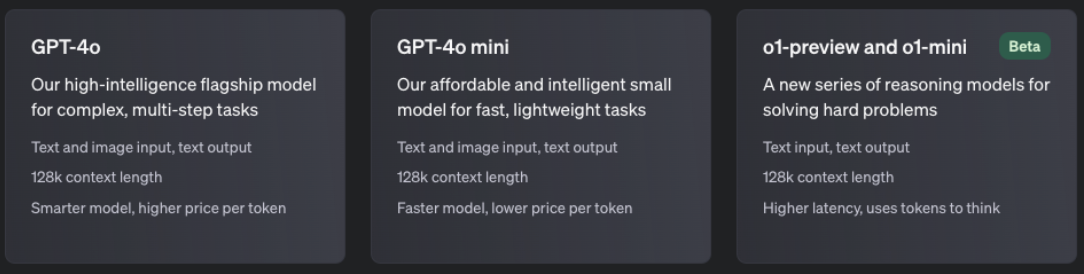
- 링크: https://platform.openai.com/docs/models


In [4]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o-mini",  # 모델명
)

# 질의내용
question = "세계 3대뮤지컬을 알려줘"

# 질의
print(f"[답변]: {llm.invoke(question)}")

[답변]: content='세계 3대 뮤지컬로 자주 언급되는 작품들은 다음과 같습니다:\n\n1. **오페라의 유령 (The Phantom of the Opera)** - 앤드류 로이드 웨버가 작곡한 이 뮤지컬은 파리 오페라 하우스를 배경으로 한 사랑과 비극의 이야기입니다. 1986년에 초연되어 지금까지도 많은 사랑을 받고 있습니다.\n\n2. **레 미제라블 (Les Misérables)** - 빅토르 위고의 소설을 바탕으로 한 이 뮤지컬은 프랑스 혁명 시대를 배경으로 한 감동적인 이야기입니다. 1980년에 처음 공연되었으며, 전 세계적으로 큰 인기를 끌고 있습니다.\n\n3. **캣츠 (Cats)** - 역시 앤드류 로이드 웨버의 작품으로, T.S. 엘리엇의 시집을 바탕으로 한 뮤지컬입니다. 고양이들의 모임을 중심으로 한 이야기로, 1981년에 초연되어 오랜 시간 동안 사랑받아 왔습니다.\n\n이 외에도 많은 훌륭한 뮤지컬들이 있지만, 이 세 작품은 특히 세계적으로 유명하고 영향력 있는 작품으로 꼽힙니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 277, 'prompt_tokens': 17, 'total_tokens': 294, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None} id='run-37372a56-a7d2-49d5-966c-8f7ef3cbd6c7-0' usage_metadata={'input_token

### 답변의 형식 (AI Message)


In [5]:
# 질의내용
question = "세계에서 가장 유명한 가수는 누구라고 생각해?"

# 질의
response = llm.invoke(question)

In [6]:
response

AIMessage(content='세계에서 가장 유명한 가수는 여러 가지 기준에 따라 다를 수 있지만, 일반적으로 마이클 잭슨, 비욘세, 아델, 테일러 스위프트, 그리고 BTS와 같은 아티스트들이 자주 언급됩니다. 이들은 전 세계적으로 큰 팬층을 보유하고 있으며, 음악 차트에서도 높은 순위를 기록하는 등 영향력이 큽니다. 개인의 취향이나 지역에 따라 다르게 느껴질 수 있으니, 어떤 가수가 가장 유명하다고 생각하는지는 사람마다 다를 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 120, 'prompt_tokens': 20, 'total_tokens': 140, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-f5784691-e31a-4c84-a197-92c0c01e4fda-0', usage_metadata={'input_tokens': 20, 'output_tokens': 120, 'total_tokens': 140, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

In [7]:
response.content

'세계에서 가장 유명한 가수는 여러 가지 기준에 따라 다를 수 있지만, 일반적으로 마이클 잭슨, 비욘세, 아델, 테일러 스위프트, 그리고 BTS와 같은 아티스트들이 자주 언급됩니다. 이들은 전 세계적으로 큰 팬층을 보유하고 있으며, 음악 차트에서도 높은 순위를 기록하는 등 영향력이 큽니다. 개인의 취향이나 지역에 따라 다르게 느껴질 수 있으니, 어떤 가수가 가장 유명하다고 생각하는지는 사람마다 다를 수 있습니다.'

In [8]:
response.response_metadata

{'token_usage': {'completion_tokens': 120,
  'prompt_tokens': 20,
  'total_tokens': 140,
  'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_f85bea6784',
 'finish_reason': 'stop',
 'logprobs': None}

### 스트리밍 출력

스트리밍 옵션은 질의에 대한 답변을 실시간으로 받을 때 유용합니다.


In [27]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("선악설과 성악설 중에 어떤것을 믿어??")

In [28]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

선악설과 성악설은 인간 본성에 대한 두 가지 상반된 관점입니다. 선악설은 인간이 본래 선한 본성을 가지고 태어난다고 주장하는 반면, 성악설은 인간이 본래 악한 본성을 가지고 태어난다고 주장합니다. 

어떤 관점을 믿느냐는 개인의 철학적, 윤리적 신념에 따라 다를 수 있습니다. 어떤 사람들은 인간의 본성이 환경과 교육에 의해 크게 영향을 받는다고 믿기도 하고, 또 다른 사람들은 인간의 본성이 선과 악의 혼합이라고 보기도 합니다. 

저는 인공지능으로서 개인적인 신념이나 감정을 가지지 않지만, 다양한 관점을 이해하고 설명할 수 있습니다. 당신은 어떤 관점을 더 지지하나요?

### teddynote 스트리밍 로직


In [12]:
from langchain_teddynote.messages import stream_response

# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("지구온난화에대해 어떻게 생각해?")
stream_response(answer)

지구온난화는 현재 인류가 직면한 가장 심각한 환경 문제 중 하나입니다. 기후 변화는 생태계, 경제, 사회 전반에 걸쳐 광범위한 영향을 미치고 있으며, 극단적인 기상 현상, 해수면 상승, 생물 다양성 감소 등의 문제를 초래하고 있습니다.

온실가스 배출 증가가 주된 원인으로 지목되고 있으며, 이를 해결하기 위해서는 국제적인 협력과 개인의 노력이 모두 필요합니다. 재생 가능 에너지의 사용 확대, 에너지 효율성 향상, 지속 가능한 농업 및 산업 practices 등이 중요한 해결책으로 제시되고 있습니다.

또한, 지구온난화에 대한 인식과 교육이 중요하며, 이를 통해 더 많은 사람들이 문제의 심각성을 이해하고 행동에 나설 수 있도록 하는 것이 필요합니다. 결국, 지구온난화 문제는 단순한 환경 문제가 아니라 인류의 미래와 직결된 문제이기 때문에, 모두가 함께 해결해 나가야 할 과제입니다.

### 멀티모달 모델(이미지 인식)

멀티모달은 여러 가지 형태의 정보(모달)를 통합하여 처리하는 기술이나 접근 방식을 의미합니다. 이는 다음과 같은 다양한 데이터 유형을 포함할 수 있습니다.

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보
- 이미지: 사진, 그래픽, 그림 등 시각적 정보
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

gpt-4o 나 gpt-4-turbo 모델은 이미지 인식 기능(Vision) 이 추가되어 있는 모델입니다.


In [21]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)


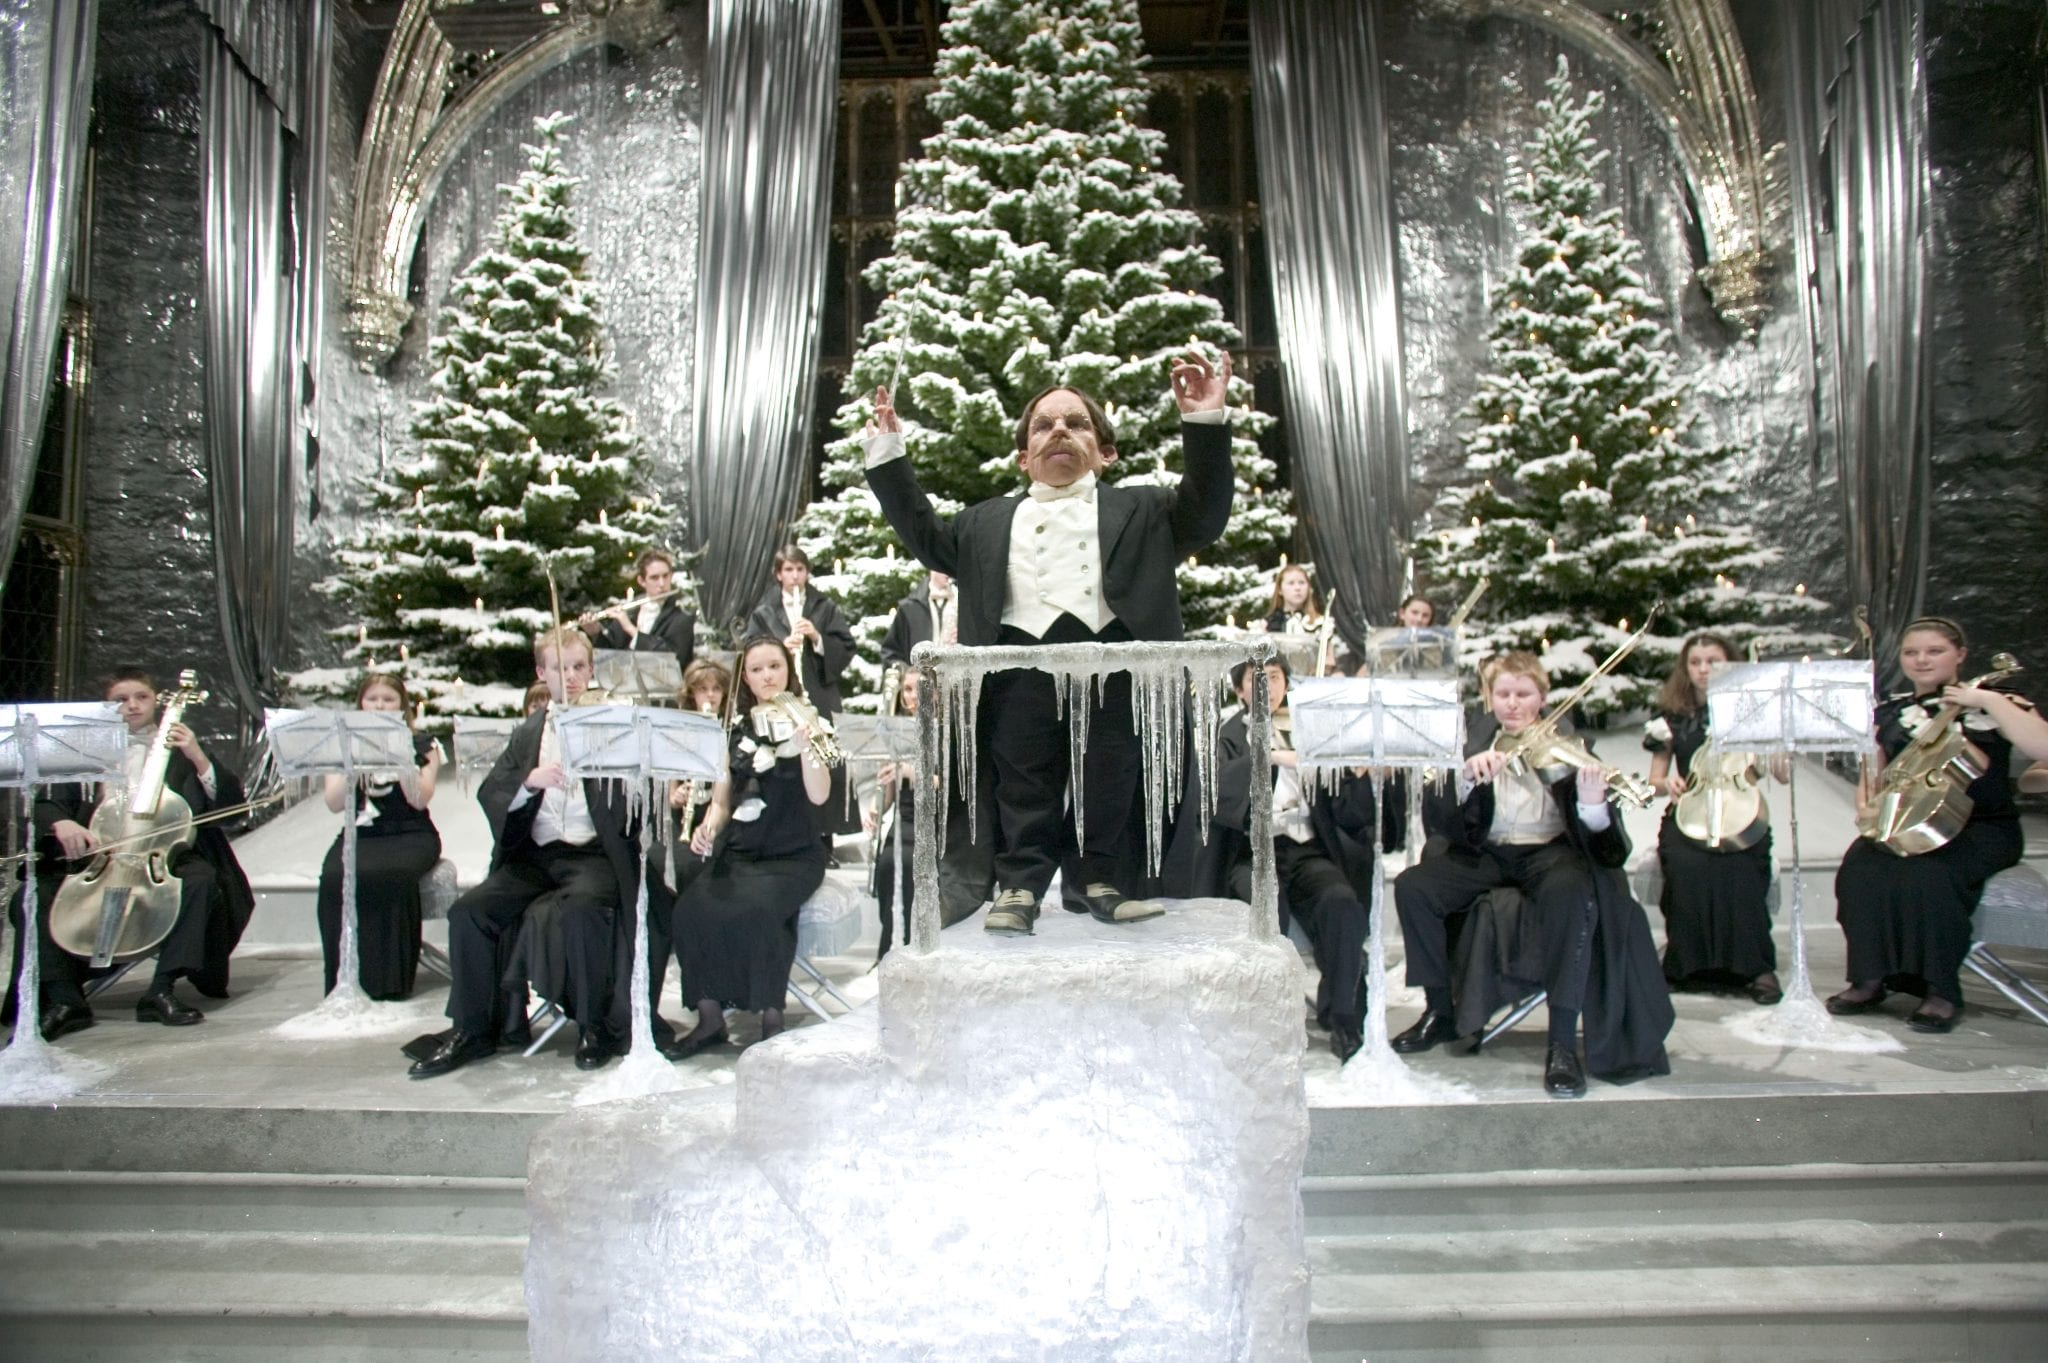

눈 덮인 크리스마스 트리 앞에서 오케스트라가 연주하고 있습니다. 지휘자는 얼음으로 만들어진 지휘대에 서 있으며, 연주자들은 악보를 보며 연주하고 있습니다. 배경은 겨울 분위기를 강조하는 장식으로 꾸며져 있습니다.

In [29]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://www.indiependent.co.uk/wp-content/uploads/2020/02/yule-scaled.jpg"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


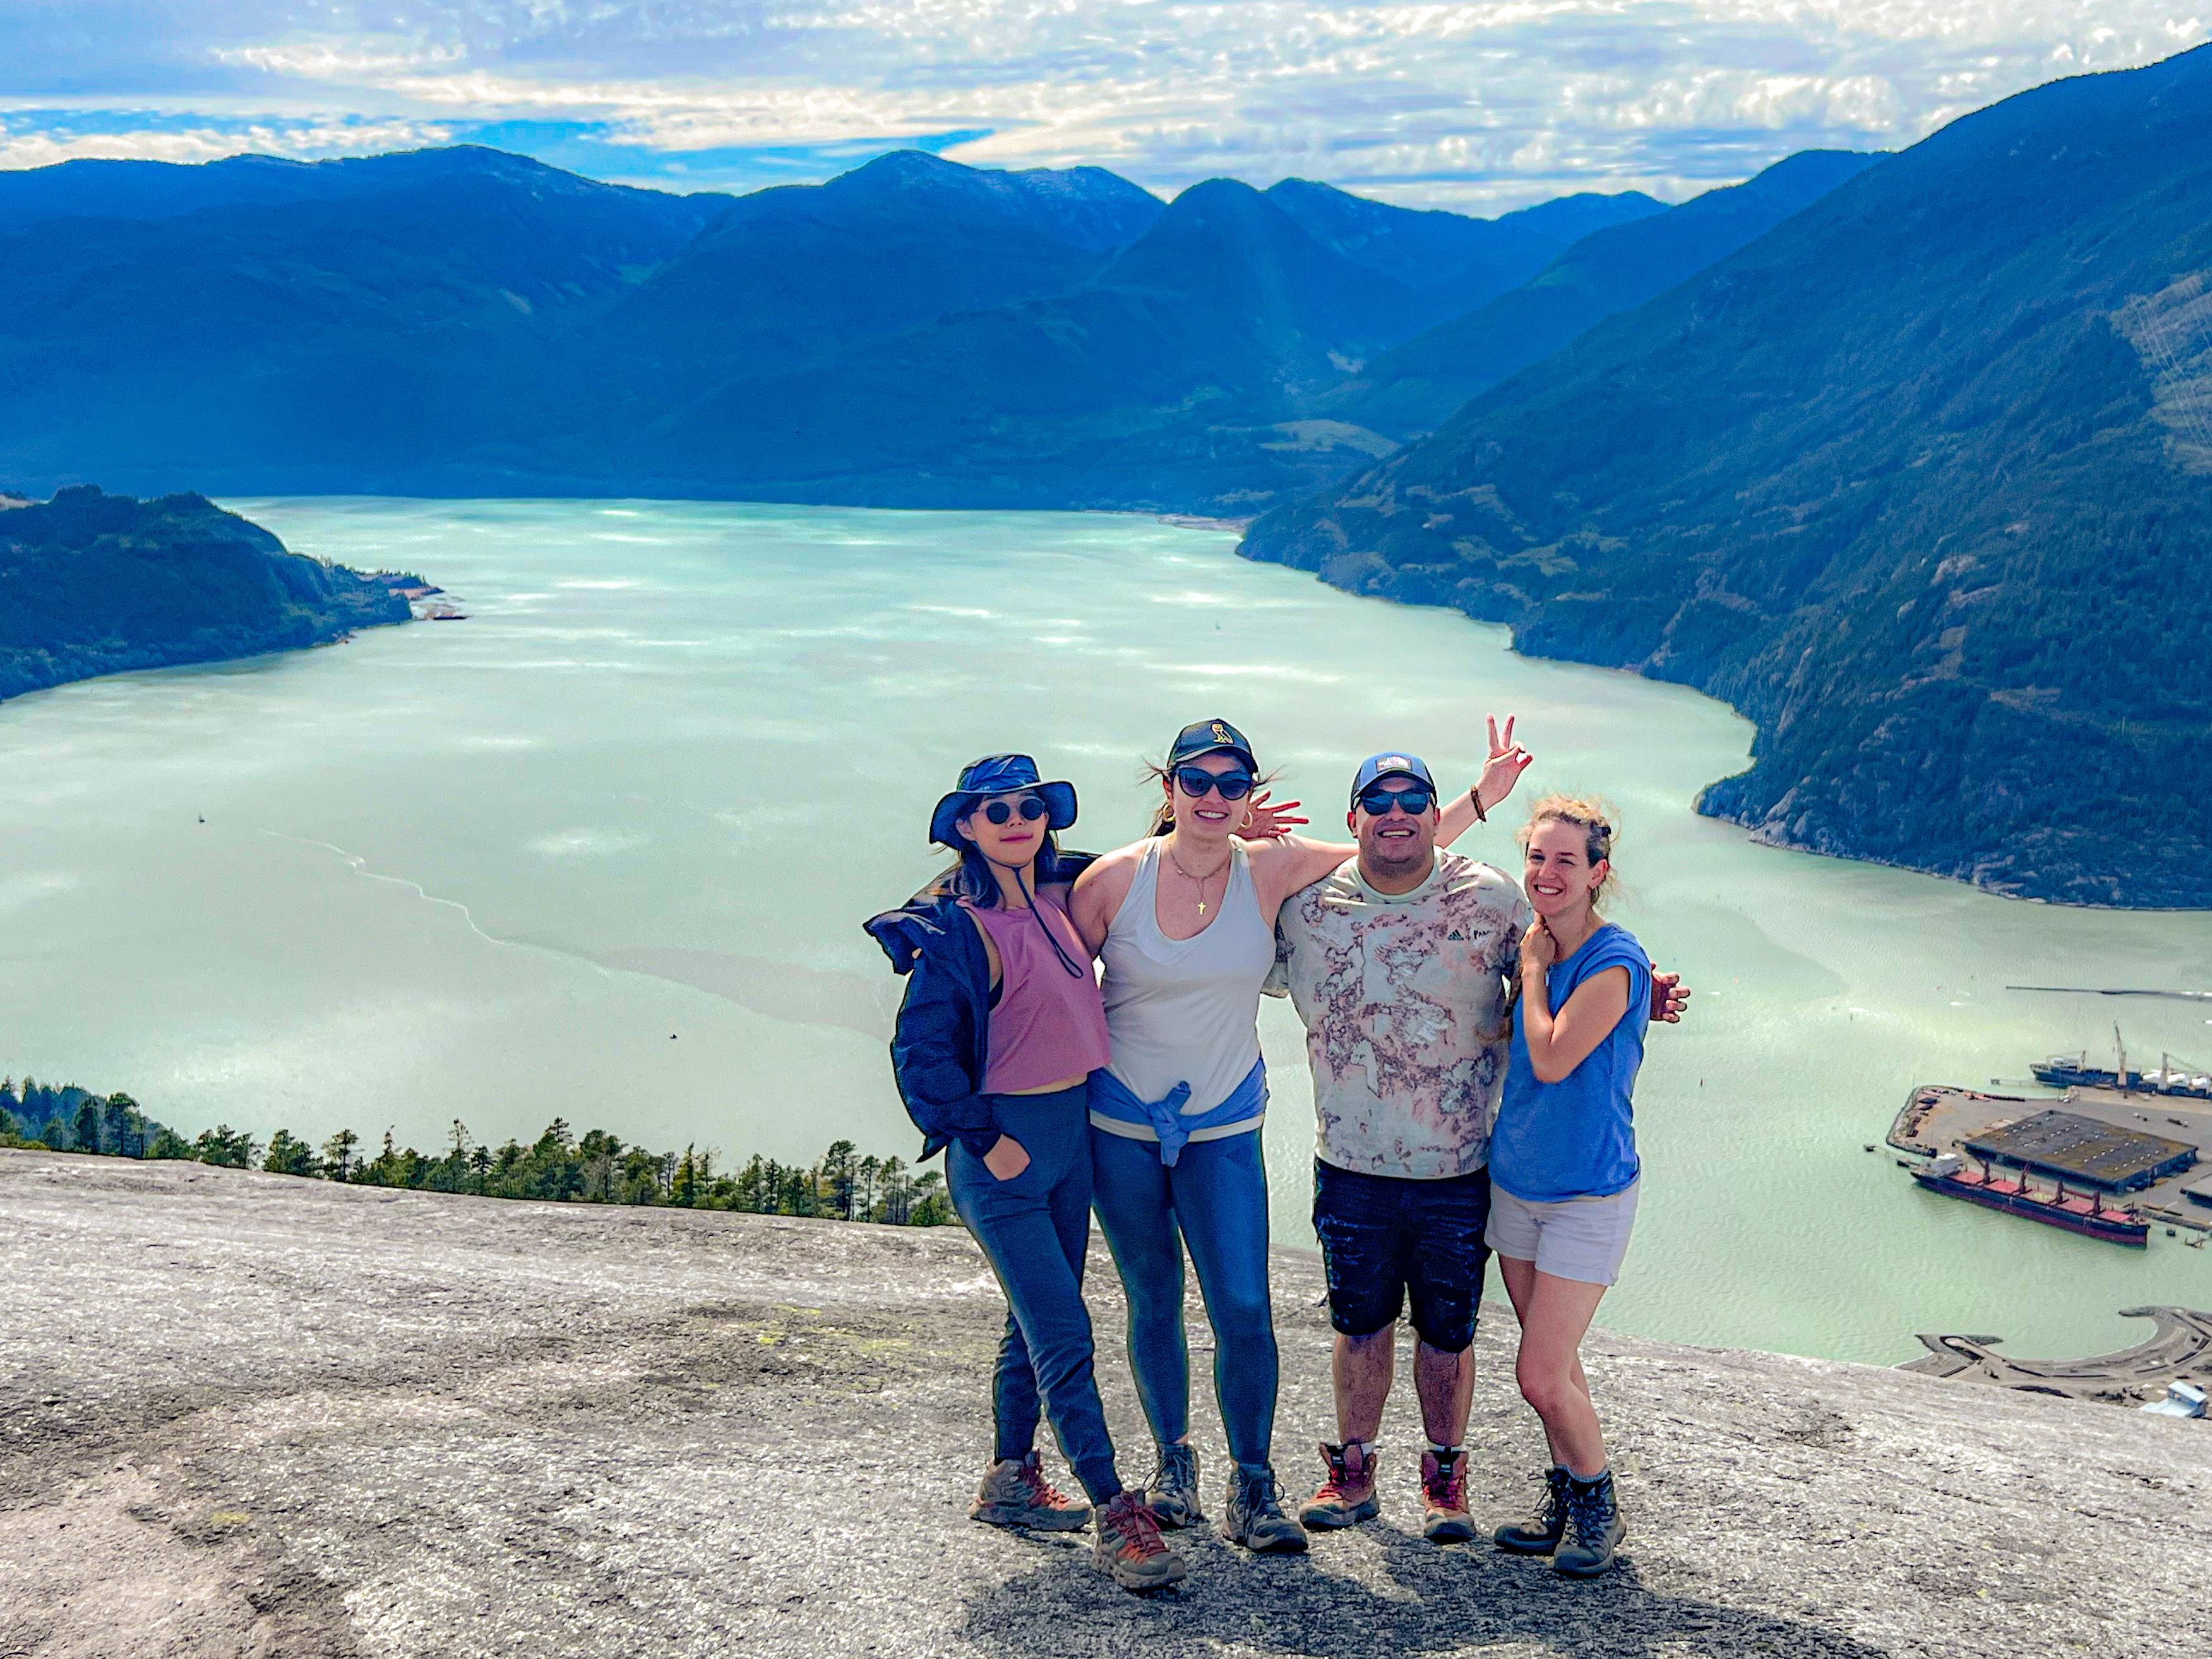

네 명의 사람들이 산 정상에서 포즈를 취하고 있습니다. 그들은 캐주얼한 옷차림을 하고 있으며, 배경에는 넓은 호수와 산맥이 펼쳐져 있습니다. 하늘은 맑고 햇빛이 밝게 비치고 있습니다.

In [16]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "/Users/ruahkim/Desktop/canada4.jpeg"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

### System,User 프롬프트 수정


In [17]:
system_prompt = """
당신은 뮤지컬 엔터테인먼트에서 뮤지컬 라이센스를 직접 브로드웨이에서 따오는 중요한 역할을 맏은 매니저 입니다. 
대중들이 가장선호할것 같은 최신뮤지컬을 골라오는 역할을 합니다.
"""

user_prompt = "당신은 현재 뉴욕 브로드웨이에 있습니다. 요즘 가장 핫한 해당 이미지의 뮤지컬에 대해 추천하고 제안서를 작성하세요."

# 멀티모달 객체생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


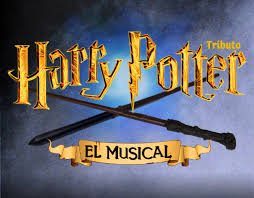

죄송하지만 이미지에 대한 자세한 설명을 제공할 수 없습니다. 그러나 현재 뉴욕 브로드웨이에서 인기 있는 판타지 뮤지컬로는 "해리 포터와 저주받은 아이"가 있습니다. 이 작품은 해리 포터 시리즈의 후속 이야기로, 마법과 모험이 가득한 무대 연출로 많은 사랑을 받고 있습니다.

**제안서 예시:**

---

**제목: "해리 포터와 저주받은 아이" 뮤지컬 라이선스 제안서**

**1. 개요**
- **작품명:** 해리 포터와 저주받은 아이
- **장르:** 판타지, 드라마
- **대상 관객:** 가족, 청소년, 해리 포터 팬

**2. 작품 소개**
- **줄거리:** 해리 포터 시리즈의 후속 이야기로, 해리의 아들 알버스 세베루스 포터가 주인공입니다. 과거와 현재가 얽히며 펼쳐지는 마법 세계의 모험을 그립니다.
- **특징:** 화려한 무대 연출과 마법 같은 특수 효과, 감동적인 스토리라인

**3. 시장 분석**
- **관객층:** 해리 포터 팬층은 전 세계적으로 두텁고, 다양한 연령층을 아우릅니다.
- **경쟁력:** 원작의 인기와 더불어, 브로드웨이에서의 성공적인 공연 기록이 있습니다.

**4. 기대 효과**
- **흥행성:** 해리 포터 브랜드의 강력한 팬덤을 기반으로 높은 관객 동원 예상
- **문화적 영향:** 판타지 장르의 확장과 새로운 관객층 유입

**5. 결론**
- "해리 포터와 저주받은 아이"는 판타지 뮤지컬 시장에서 독보적인 위치를 차지할 수 있는 작품입니다. 라이선스를 통해 국내에서도 성공적인 공연을 기대할 수 있습니다.

---

이와 같은 형식으로 제안서를 작성하여 제출할 수 있습니다.

In [22]:
img_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5dZOD8g-vuTF0ym78gzCE9ZAYG47KjgOm_A&s"

answer = multimodal_llm_with_prompt.stream(img_url)

stream_response(answer)
